In [1]:
import pandas as pd
df_master = pd.read_pickle('/path/to/pklFiles/df_master_validation.pkl')

In [2]:
df_master = df_master.sort_values(['id', 'date'])
df_master.head()

/opt/homebrew/anaconda3/envs/thesis/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/opt/homebrew/anaconda3/envs/thesis/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,...,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,date
576,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,1,3.0,0,2.0,...,0,0,29,4,1,0,5,5,1,2011-01-29
11508,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2,0.0,0,2.0,...,0,0,30,4,1,0,5,6,1,2011-01-30
22440,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0.0,0,2.0,...,0,0,31,5,1,0,5,0,0,2011-01-31
33372,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,4,1.0,0,2.0,...,1,0,1,5,2,0,1,1,0,2011-02-01
44304,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,5,4.0,0,2.0,...,0,1,2,5,2,0,1,2,0,2011-02-02


In [ ]:
import pandas as pd
import numpy as np

# Assume df_master is your DataFrame and 'sales' is the target variable.
smoothing = 10  # You can adjust this parameter as needed

# Compute the global mean of the target variable
global_mean = df_master['sales'].mean()

# List of columns to target encode
columns_to_encode = ['event_name_1','event_type_1', 'event_name_2', 'event_type_2']

# Loop through each column and compute the target encoding
for col in columns_to_encode:
    # Aggregate target statistics for each category in the column
    agg = df_master.groupby(col)['sales'].agg(['mean', 'count'])
    
    # Compute the smoothed target encoding
    agg['target_enc'] = (agg['count'] * agg['mean'] + smoothing * global_mean) / (agg['count'] + smoothing)
    
    # Map the smoothed target encoding back to the original DataFrame
    new_column_name = col + '_enc'
    df_master[new_column_name] = df_master[col].map(agg['target_enc'])
    

/var/folders/rx/1z_1x1zx2gn03q1qnbbzx7g40000gn/T/ipykernel_4473/368420207.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_master.groupby(col)['sales'].agg(['mean', 'count'])


Encoding for event_name_1:


/var/folders/rx/1z_1x1zx2gn03q1qnbbzx7g40000gn/T/ipykernel_4473/368420207.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_master.groupby(col)['sales'].agg(['mean', 'count'])


Encoding for event_type_1:
Encoding for event_name_2:


/var/folders/rx/1z_1x1zx2gn03q1qnbbzx7g40000gn/T/ipykernel_4473/368420207.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_master.groupby(col)['sales'].agg(['mean', 'count'])
/var/folders/rx/1z_1x1zx2gn03q1qnbbzx7g40000gn/T/ipykernel_4473/368420207.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_master.groupby(col)['sales'].agg(['mean', 'count'])


Encoding for event_type_2:


In [4]:
# List of columns to be deleted
columns_to_delete = [
    'event_name_1', 
    'event_type_1', 
    'event_name_2', 
    'event_type_2'
]

# Dropping the specified columns
df_master = df_master.drop(columns=columns_to_delete)

In [5]:
# List of columns to be deleted
columns_to_delete = [
    'id',
    'item_id', 
    'dept_id', 
    'cat_id', 
    'store_id',
    'state_id',
    'price_nunique',
    'item_nunique'

]

# Dropping the specified columns
df_master_without_static = df_master.drop(columns=columns_to_delete)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Pearson correlation matrix for the entire DataFrame
corr_matrix = df_master_without_static.corr(method='pearson')

# Display the correlation matrix
print(corr_matrix)

                         d     sales   release  sell_price  price_max  \
d                 1.000000 -0.038773  0.353694    0.019673   0.005401   
sales            -0.038773  1.000000 -0.047328   -0.150813  -0.144658   
release           0.353694 -0.047328  1.000000    0.032722   0.016180   
sell_price        0.019673 -0.150813  0.032722    1.000000   0.968781   
price_max         0.005401 -0.144658  0.016180    0.968781   1.000000   
price_min         0.021982 -0.141613  0.062241    0.958979   0.926871   
price_std        -0.046747 -0.057991 -0.130266    0.411594   0.545096   
price_mean        0.011313 -0.150365  0.032754    0.996720   0.971979   
price_norm        0.154328 -0.078445  0.164090    0.109785  -0.010680   
price_momentum   -0.000104 -0.000042  0.000215    0.001303   0.000555   
price_momentum_m  0.137864 -0.026395  0.001092    0.059686   0.000873   
price_momentum_y  0.006312 -0.008984  0.000202    0.042422   0.000563   
snap_CA          -0.003818  0.013421 -0.000998   -0

In [7]:
# Assuming 'sales' is your target variable:
sales_corr = corr_matrix['sales'].sort_values(ascending=False)
print("Pearson Correlation with 'sales':")
print(sales_corr)

Pearson Correlation with 'sales':
sales               1.000000
event_name_1_enc    0.071761
tm_w_end            0.042710
tm_dw               0.035394
event_name_2_enc    0.032038
event_type_1_enc    0.026664
event_type_2_enc    0.022070
snap_WI             0.015493
snap_TX             0.015292
snap_CA             0.013421
price_momentum     -0.000042
tm_m               -0.004134
tm_w               -0.006362
price_momentum_y   -0.008984
tm_wm              -0.017133
tm_d               -0.017922
price_momentum_m   -0.026395
tm_y               -0.036833
date               -0.038773
d                  -0.038773
release            -0.047328
price_std          -0.057991
price_norm         -0.078445
price_min          -0.141613
price_max          -0.144658
price_mean         -0.150365
sell_price         -0.150813
Name: sales, dtype: float64


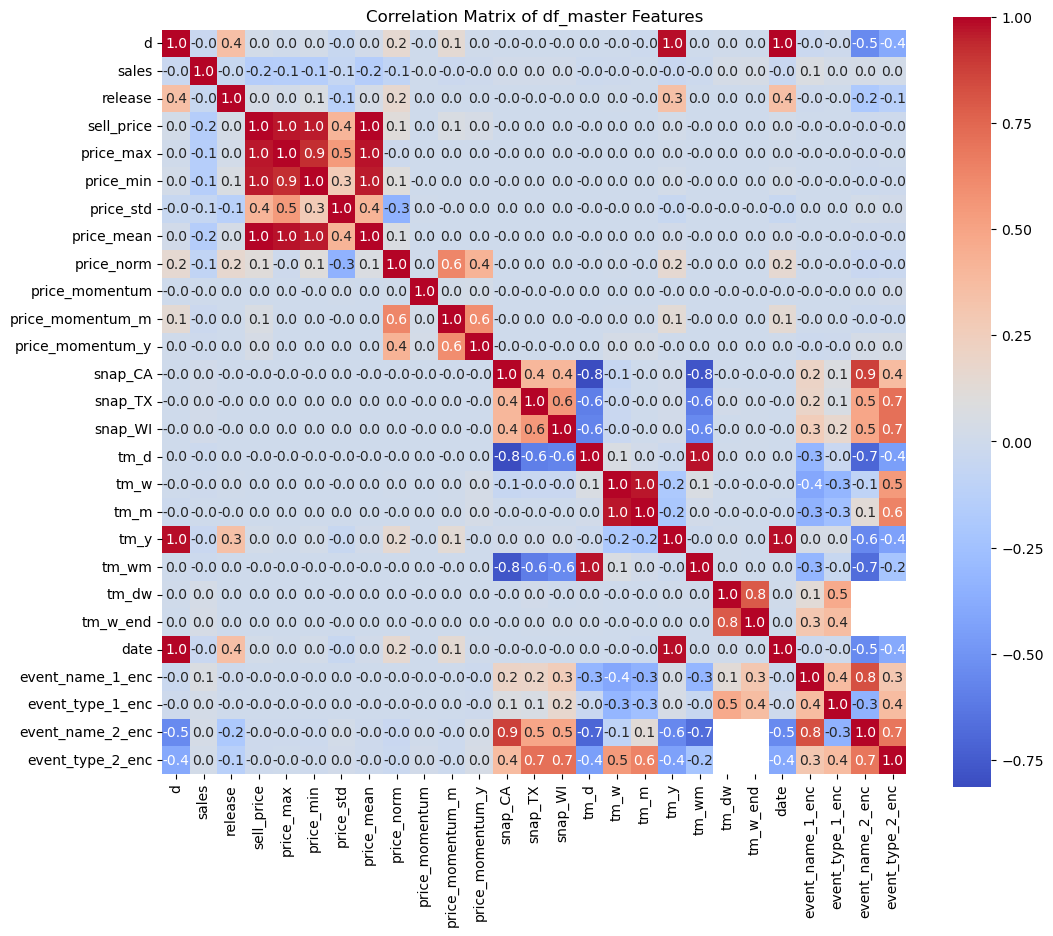

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True)

plt.title("Correlation Matrix of df_master Features")
plt.show()

pearson does get not linear relationships


I run a RandomForestRegressor(n_estimators=100, random_state=42,verbose=1,max_samples=0.2)

Random Forest Feature Importances: \
price_mean          0.370419 \
price_std           0.225969 \
tm_dw               0.073582 \
price_min           0.058999\
price_norm          0.055674\
price_max           0.043213\
sell_price          0.042397\
snap_CA             0.028555\
snap_WI             0.027949\
snap_TX             0.027713\
event_name_1_enc    0.025911\
tm_w_end            0.010196\
event_type_1_enc    0.009075\
event_name_2_enc    0.000253\
event_type_2_enc    0.000095

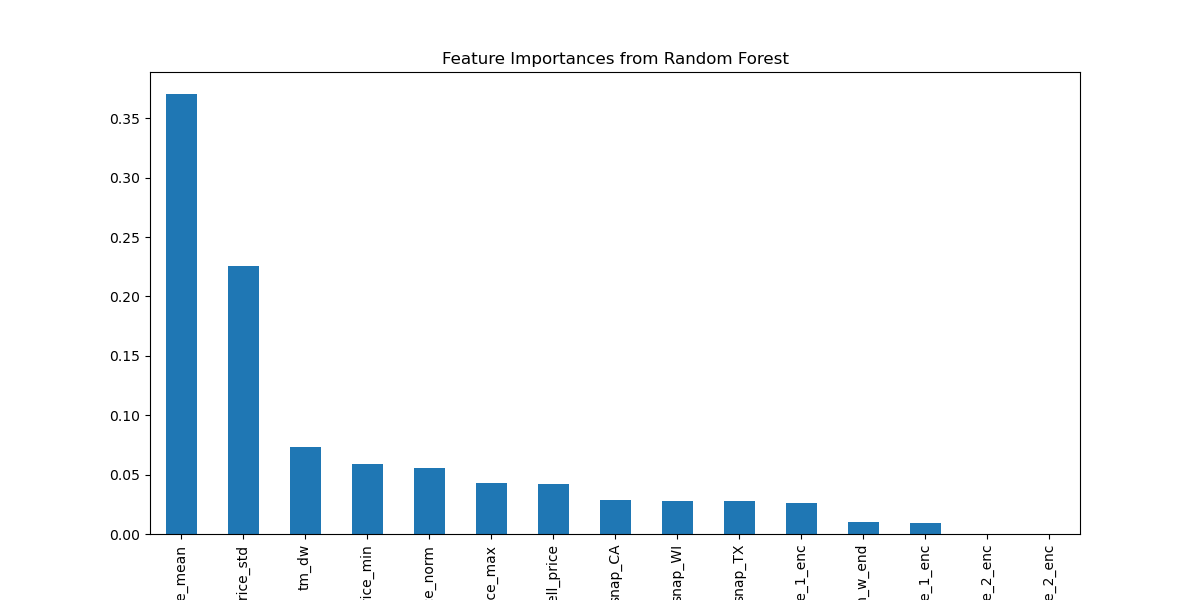

Mutual Information Scores

Mutual Information Scores (on sample):\
price_mean          0.129050\
price_std           0.101095\
price_max           0.089145\
sell_price          0.080739\
price_min           0.075971\
price_norm          0.042491\
release             0.019464\
price_momentum_m    0.008945\
price_momentum_y    0.007956\
d                   0.006801\
tm_w_end            0.002042\
tm_y                0.001565\
tm_dw               0.001253\
tm_wm               0.000908\
tm_w                0.000753\
tm_d                0.000608\
snap_CA             0.000469\
tm_m                0.000347\
snap_WI             0.000244\
snap_TX             0.000039

2nd: rf = RandomForestRegressor(n_estimators=20, random_state=42,verbose=2,max_samples=0.1,n_jobs=-1)

Random Forest Feature Importances:
price_mean          0.214510
d                   0.124917
price_std           0.115230
item_nunique        0.072361
tm_d                0.067232
wm_yr_wk            0.060008
tm_dw               0.048425
release             0.043339
tm_m                0.040517
price_momentum_m    0.038555
price_min           0.028505
price_max           0.022408
price_nunique       0.021282
price_momentum_y    0.020306
tm_wm               0.012879
sell_price          0.011957
price_norm          0.010993
snap_WI             0.009339
snap_TX             0.008823
event_name_1_enc    0.008584
tm_w_end            0.007758
tm_y                0.004103
snap_CA             0.004000
event_type_1_enc    0.003824
event_name_2_enc    0.000086
event_type_2_enc    0.000058

ΜΙ

price_mean          0.126121
price_std           0.095986
price_max           0.088572
sell_price          0.080020
price_min           0.075105
price_norm          0.041388
item_nunique        0.026337
release             0.019635
price_momentum_m    0.007869
price_momentum_y    0.006569
d                   0.006245
price_nunique       0.005298
wm_yr_wk            0.002742
tm_dw               0.002248
tm_w_end            0.002135
tm_y                0.001625
snap_CA             0.000795
tm_wm               0.000753
snap_TX             0.000639
tm_d                0.000363
snap_WI             0.000000
tm_m                0.000000